# Prepare rules for the all the data sets
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values 2) Change the minimum length in apriori algorithm 3) Visulize the obtained rules using different plots



In [30]:
!pip install mlxtend

In [41]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [32]:
Movies= pd.read_csv("my_movies.csv")
Movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [33]:
Movies.shape

(10, 15)

In [34]:
Movies1= Movies.iloc[:,5:15]
Movies1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


# Apriori Algorithm for min support= 0.1

In [35]:
frequent_itemsets = apriori(Movies1, min_support=0.1, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets 

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.1,(Harry Potter2),1
7,0.1,(LOTR),1
8,0.1,(Braveheart),1
9,0.2,(Green Mile),1


# Rules for min support = 0.1, level of confidence above 70 percent threshold (min_threshold=0.7)

In [36]:
rules1 = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules1['length'] = rules1['antecedents'].apply(lambda x: len(x)) + rules1['consequents'].apply(lambda x: len(x))
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,2
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,2
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,2
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,2
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,2
...,...,...,...,...,...,...,...,...,...,...
124,"(Sixth Sense, LOTR1)","(Green Mile, Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,5
125,"(Harry Potter1, Sixth Sense)","(Green Mile, LOTR2, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,5
126,"(LOTR2, Sixth Sense)","(Green Mile, Harry Potter1, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,5
127,"(Harry Potter1, LOTR1)","(Green Mile, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,5


In [37]:
rules1[rules1.lift>1] 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,2
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,2
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,2
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,2
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,2
...,...,...,...,...,...,...,...,...,...,...
124,"(Sixth Sense, LOTR1)","(Green Mile, Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,5
125,"(Harry Potter1, Sixth Sense)","(Green Mile, LOTR2, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,5
126,"(LOTR2, Sixth Sense)","(Green Mile, Harry Potter1, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,5
127,"(Harry Potter1, LOTR1)","(Green Mile, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,5


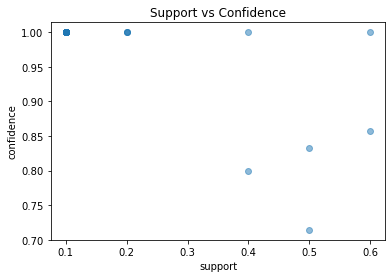

In [38]:
plt.scatter(rules1['support'], rules1['confidence'], alpha = 0.5) 
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence') 
plt.show() 

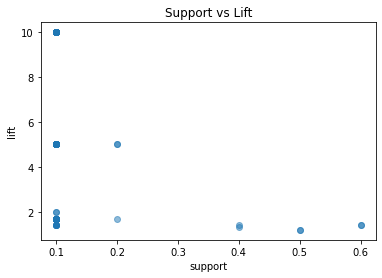

In [39]:
plt.scatter(rules1['support'], rules1['lift'], alpha = 0.5)
plt.xlabel('support')
plt.ylabel('lift') 
plt.title('Support vs Lift') 
plt.show()
 

# Rules for min support = 0.1, level of confidence above 70 percent threshold (min_threshold=0.7) and length=2

In [43]:
rules2=rules1[ (rules1['length'] == 2)]
rules2 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,2
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,2
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,2
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,2
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,2
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,2
6,(LOTR),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf,2
7,(Braveheart),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf,2
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,2
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,2


In [44]:
rules2.shape

(13, 10)

# For length = 2, no of rules=13

# Rules for min support = 0.1, level of confidence above 70 percent threshold (min_threshold=0.7) and length=5


In [45]:
rules5=rules1[ (rules1['length'] == 5)]
rules5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
106,"(Green Mile, Harry Potter1, Sixth Sense, LOTR1)",(LOTR2),0.1,0.2,0.1,1.0,5.000000,0.08,inf,5
107,"(Green Mile, LOTR2, Sixth Sense, LOTR1)",(Harry Potter1),0.1,0.2,0.1,1.0,5.000000,0.08,inf,5
108,"(Green Mile, Harry Potter1, Sixth Sense, LOTR2)",(LOTR1),0.1,0.2,0.1,1.0,5.000000,0.08,inf,5
109,"(Green Mile, Harry Potter1, LOTR1, LOTR2)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf,5
110,"(LOTR2, Harry Potter1, Sixth Sense, LOTR1)",(Green Mile),0.1,0.2,0.1,1.0,5.000000,0.08,inf,5
111,"(Green Mile, Sixth Sense, LOTR1)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,5
112,"(Green Mile, Harry Potter1, Sixth Sense)","(LOTR2, LOTR1)",0.1,0.2,0.1,1.0,5.000000,0.08,inf,5
113,"(Green Mile, LOTR2, Sixth Sense)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,5
114,"(Green Mile, Harry Potter1, LOTR1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,5
115,"(Green Mile, LOTR2, LOTR1)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,5


In [46]:
rules5.shape

(23, 10)

# For length = 5, no of rules=23

# Apriori Algorithm for min support= 0.2


In [50]:
frequent_itemsets1 = apriori(Movies1, min_support=0.2, use_colnames=True)
frequent_itemsets1['length'] = frequent_itemsets1['itemsets'].apply(lambda x: len(x))
frequent_itemsets1  

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.2,(Green Mile),1
7,0.5,"(Sixth Sense, Gladiator)",2
8,0.4,"(Sixth Sense, Patriot)",2
9,0.2,"(Green Mile, Sixth Sense)",2


# Rules for min support = 0.2, level of confidence above 40 percent threshold (min_threshold=0.4)

In [51]:
rules6 = association_rules(frequent_itemsets1, metric="confidence", min_threshold=0.4)
rules6['length'] = rules6['antecedents'].apply(lambda x: len(x)) + rules6['consequents'].apply(lambda x: len(x))
rules6

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,2
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,2
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,2
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,2
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,2
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,2
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,2
9,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,3


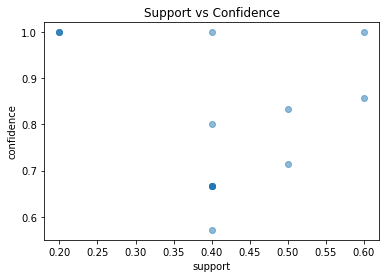

In [52]:
plt.scatter(rules6['support'], rules6['confidence'], alpha = 0.5) 
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence') 
plt.show()

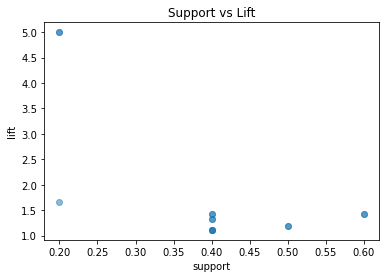

In [53]:
plt.scatter(rules6['support'], rules6['lift'], alpha = 0.5)
plt.xlabel('support')
plt.ylabel('lift') 
plt.title('Support vs Lift') 
plt.show()

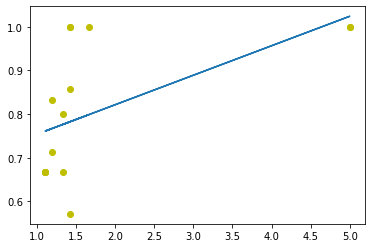

In [54]:
fit = np.polyfit(rules6['lift'], rules6['confidence'], 1)
fit_fn = np.poly1d(fit) 
plt.plot(rules6['lift'], rules6['confidence'], 'yo', rules6['lift'], fit_fn(rules6['lift']))

# Rules for min support = 0.2, level of confidence above 40 percent threshold (min_threshold=0.4) and length=2

In [55]:
rules7=rules6[ (rules6['length'] == 2)]
rules7

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,2
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,2
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,2
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,2
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,2
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,2
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,2


In [57]:
rules7.shape

(9, 10)

# for min support value 0f 0.2 and threshold confidence value of 0.4 there are 9 rules with length= 2

In [58]:
rules8=rules6[ (rules6['length'] == 3)]
rules8

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
9,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,3
10,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,3
11,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,3
12,(Sixth Sense),"(Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,3
13,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,3
14,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,3


In [59]:
rules8.shape

(6, 10)

# for min support value 0f 0.2 and threshold confidence value of 0.4 there are 6 rules with length= 3